<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training Deep Neural Networks using Keras
This chapter involves different training, intitialization and normalization strategies used for enhancing the performance of a neural network in keras. 

## Exercises

### Deep Learning

#### Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

In [ ]:
#  importing essential libraries 
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# Loading the MNIST digits dataset 
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Seeing shape of the dataset 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


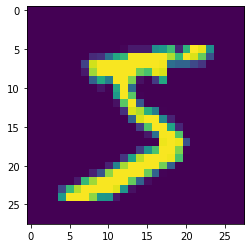

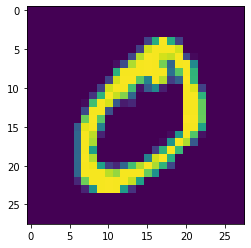

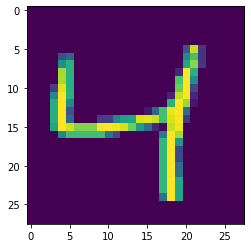

In [ ]:
# Printing first 10 images in the training dataset 
for image in X_train[:3]:
  plt.figure()
  plt.imshow(image)
  plt.show()

In [ ]:
# Seeing the first 5 elements of the training dataset
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The DNN which we are going to make is having 5 layers, with 100 neurons each, He initialization and ELU activation function.

In [ ]:
# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 5

In [ ]:
# Seperating the dataset between 0-4 and 5-9 
train04_filter = np.isin(y_train, [0, 1, 2, 3, 4])
train59_filter = np.isin(y_train, [5, 6, 7, 8, 9])

test04_filter = np.isin(y_test, [0, 1, 2, 3, 4])
test59_filter = np.isin(y_test, [5, 6, 7, 8, 9])

In [ ]:
# Splitting the data 
X_train04, y_train04, X_test04, y_test04 =  X_train[train04_filter], y_train[train04_filter], X_test[test04_filter], y_test[test04_filter]
X_train59, y_train59, X_test59, y_test59 =  X_train[train59_filter], y_train[train59_filter], X_test[test59_filter], y_test[test59_filter]


In [ ]:
print(X_train.shape)
print(X_train04.shape)
print(X_train59.shape)

(60000, 28, 28)
(30596, 28, 28)
(29404, 28, 28)


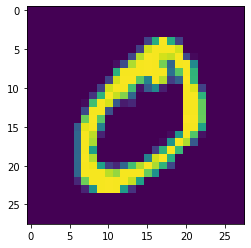

In [ ]:
# Seeing a sample from each dataset 
plt.figure()
plt.imshow(X_train04[0])
plt.show()

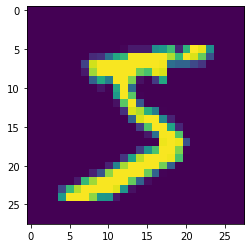

In [ ]:
plt.figure()
plt.imshow(X_train59[0])
plt.show()

In [ ]:
# Training the model 

# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 3s 3ms/step - loss: 5.8736 - val_loss: 0.3810
Epoch 2/100
813/813 [==============================] - 2s 3ms/step - loss: 0.2996 - val_loss: 0.1582
Epoch 3/100
813/813 [==============================] - 2s 3ms/step - loss: 0.1504 - val_loss: 0.1857
Epoch 4/100
813/813 [==============================] - 2s 3ms/step - loss: 0.1324 - val_loss: 0.1267
Epoch 5/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0926 - val_loss: 0.0846
Epoch 6/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0791 - val_loss: 0.0923
Epoch 7/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0764 - val_loss: 0.0636
Epoch 8/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0536 - val_loss: 0.0624
Epoch 9/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0453 - val_loss: 0.0628
Epoch 10/100
813/813 [==============================] - 2s 3ms/step - loss: 0.0448 - val_lo

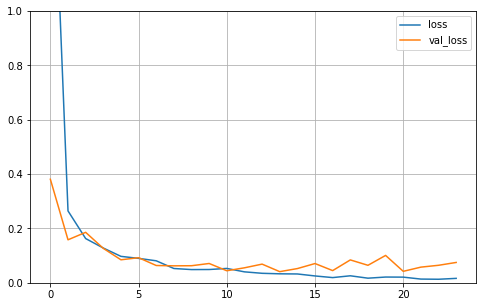

In [ ]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Evaluating the model 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.0497


0.04966454580426216

In [ ]:
# Adding batch normalization and repeating the process 

# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.BatchNormalization(),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [ ]:
# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 5s 5ms/step - loss: 0.2306 - val_loss: 0.1106
Epoch 2/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0707 - val_loss: 0.1102
Epoch 3/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0497 - val_loss: 0.1024
Epoch 4/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0404 - val_loss: 0.0999
Epoch 5/100
813/813 [==============================] - 3s 4ms/step - loss: 0.0307 - val_loss: 0.1160
Epoch 6/100
813/813 [==============================] - 4s 4ms/step - loss: 0.0269 - val_loss: 0.1122
Epoch 7/100
813/813 [==============================] - 4s 4ms/step - loss: 0.0255 - val_loss: 0.1327
Epoch 8/100
813/813 [==============================] - 4s 4ms/step - loss: 0.0214 - val_loss: 0.1785
Epoch 9/100
813/813 [==============================] - 4s 4ms/step - loss: 0.0221 - val_loss: 0.1586
Epoch 10/100
813/813 [==============================] - 4s 4ms/step - loss: 0.0202 - val_lo

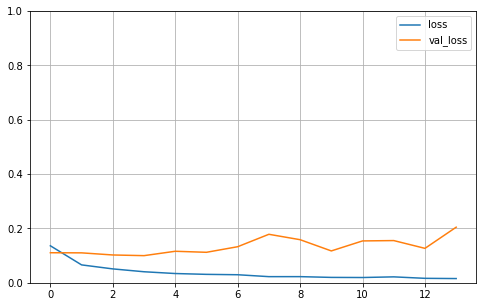

In [ ]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Evaluating model on test data 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.2778


0.2777937054634094

The model has in turn performed worse than the previous iteration, it has most probably overfitted.

In [ ]:
# Creating a new model with dropout before every layer

# Making the network architecture
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.Dropout(rate=0.2),  
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dropout(rate=0.2),
              keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
              keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

In [ ]:
# Making callbacks 
checkpoints_cb = keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# Compiling the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

# Training the model 
history = model.fit(X_train04, y_train04, epochs=100,
                    validation_split=0.15, callbacks = [checkpoints_cb, early_stopping_cb])

Epoch 1/100
813/813 [==============================] - 3s 3ms/step - loss: 21.3494 - val_loss: 0.2550
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.7097 - val_loss: 0.2083
Epoch 3/100
813/813 [==============================] - 3s 3ms/step - loss: 0.4805 - val_loss: 0.1559
Epoch 4/100
813/813 [==============================] - 3s 3ms/step - loss: 0.3667 - val_loss: 0.1294
Epoch 5/100
813/813 [==============================] - 3s 3ms/step - loss: 0.2906 - val_loss: 0.1256
Epoch 6/100
813/813 [==============================] - 3s 3ms/step - loss: 0.2644 - val_loss: 0.1080
Epoch 7/100
813/813 [==============================] - 3s 3ms/step - loss: 0.2236 - val_loss: 0.0963
Epoch 8/100
813/813 [==============================] - 3s 3ms/step - loss: 0.2082 - val_loss: 0.1000
Epoch 9/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1920 - val_loss: 0.0982
Epoch 10/100
813/813 [==============================] - 3s 3ms/step - loss: 0.1743 - val_l

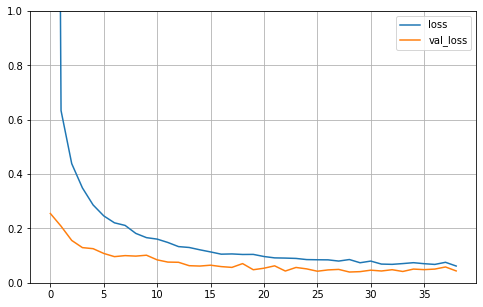

In [28]:
# Seeing learning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
# Evaluating the model 
model.evaluate(X_test04, y_test04)

161/161 [==============================] - 0s 1ms/step - loss: 0.0440


0.043982960283756256

#### Conclusion
Dropout turned out to be more efficient in improving the model's performance in this case as compared to batch normalization.